In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time as t

In [16]:
### Distance functions

# Nested loop
# For every atom look at the distance to every atom
def ed_nested(positions):
    distances = []    
    for positionA in positions:
            a = np.array(positionA)
            for positionB in positions:
                b = np.array(positionB)
                distance = np.linalg.norm(a-b)
                distances.append(distance)
    return distances

# Matrix mult
# For every atom apply matrix multiplication to entire atom array
def ed_matrix(positions):
    distances  = []
    for position in positions:
        net = position - positions
        s = np.dot(net, net.T)
        distance = np.diagonal(np.sqrt(np.sqrt(s**2)))
        distances.append(distance)
    
    return distances

In [17]:
# timing function
def time_funcs(max_atoms, step):
    '''
    Function to time ed_nested() and ed_matrix distance functions
    Args:
        max_atoms: max number of atoms from which to calculate interatomic distances
        step: increment size in number of atoms up to max_atoms
        
    '''
    
    times_nested = []
    times_matrix = []
    
    iterations = range(1, max_atoms + step, step)
    
    for i in iterations:
        positions = np.random.rand(i,3)
        
        start_nested = t.time()
        d = ed_nested(positions)
        total_nested = t.time() - start_nested
        times_nested.append(total_nested)
        
        
        start_matrix = t.time()
        d = ed_matrix(positions)
        total_matrix = t.time() - start_matrix
        times_matrix.append(total_matrix)
    
    atom_number = list(iterations)
    
    return atom_number, times_nested, times_matrix    

In [22]:
# run timing function
atom_number, times_nested, times_matrix = time_funcs(2000, 200)

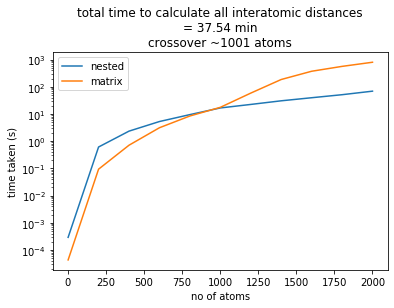

In [26]:
# plot results

total_time = round((sum(times_nested) + sum(times_matrix))/60, 2)

unit_cell_no = np.array(atom_number) / 5
supercell_size = unit_cell_no ** (1/3)

# comparing data to determine a crossover 
# doesn't work at low atom numbers
abs_diff = abs(np.log(times_nested) - np.log(times_matrix)).tolist()
cross_over = atom_number[abs_diff.index(min(abs_diff))]


plt.plot(atom_number, times_nested, label = 'nested')
plt.plot(atom_number, times_matrix, label = 'matrix')
plt.xlabel('no of atoms')
plt.ylabel('time taken (s)')
plt.yscale('log')
plt.legend()
plt.title(f'''total time to calculate all interatomic distances
= {total_time} min
crossover ~{cross_over} atoms''')
plt.show()

In [ ]:
###------------------------------------------------------------------------
###
### Program to copute interatomic distances from a non-orthonomal basis
###
###------------------------------------------------------------------------

# Import relevant libraries

import numpy as np



# Lattice parameters - unit cell length and angles
a = 1
b = 1
c = 1

al = np.deg2rad(90)
be = np.deg2rad(90)
ga = np.deg2rad(90)


# Atomic positions
atomA = np.array([[0, 0, 0]]) # [0, 0, 0] for vector origin
atomB = np.array([[0, 0, 1]]) # position of iterest (fractional)
atomC = np.array([[0, 1, 0]]) # 2nd position of interest (mainly for angle calcs)

# Vector or  positions relative to atomA 

vBA = atomB - atomA
vCA = atomC - atomA
vBC = atomB - atomC

# Triclinic Metric Tensor
g=np.array([[a ** 2, a * b * np.cos(ga), a * c * np.cos(be)], \
[b * a * np.cos(ga),b ** 2 , b * c * np.cos(al)], \
[c * a * np.cos(be), c * b * np.cos(al), c ** 2]])

# Orthonormal distance between atoms (matrix multiplication)
dBA = (vBA @ g @ vBA.transpose())**0.5
dCA = (vCA @ g @ vCA.transpose())**0.5
dBC = (vBC @ g @ vBC.transpose())**0.5

# dot product between B and C (matrix multiplication)
dpBC = vBA @ g @ vCA.transpose()

##print('Metric tensor', g, sep = '\n')
##print('Distance B to A: ',str(dBA).replace('[','').replace(']',''))
##print('Distance C to A: ',str(dCA).replace('[','').replace(']',''))
##print('Distance B to C: ',str(dBC).replace('[','').replace(']',''))
##
##
##
##if np.array_equal(atomA, atomB) or np.array_equal(atomA, atomC):
##    angleCAB = 'B or C cannot equal A!'
##else:
##    angleCAB = np.rad2deg(np.arccos(dpBC / (((dBA ** 2) * (dCA ** 2)) ** 0.5)))
##
##print('Angle between B and C: ',str(angleCAB).replace('[','').replace(']',''))

no_atoms = 5000

atom_list = np.random.rand(no_atoms,3)

distances = []
import time as t

start = t.time()

for atom in atom_list:
	vector = atom - atom_list
	distance =np.diagonal(np.sqrt(vector @ g @ vector.transpose()))
	distances.append(distance)

runtime = t.time() - start

print(f'total time {runtime}')



<ipython-input-5-4314d9db75e7>:72: RuntimeWarning: invalid value encountered in sqrt
  distance =np.diagonal(np.sqrt(vector @ g @ vector.transpose()))
